# Tutorial 01: Writing first MNIST Program
By Rahul GAWAI

## Introduction
This program is inspired by [GitHub](https://github.com/Hvass-Labs/TensorFlow-Tutorials)

Python used: 3.6
TensorFlow version: 1.10

## Importing packages

In [2]:
import tensorflow as tf

import sys
import os
import urllib.request
import gzip
import numpy as np
import matplotlib.pyplot as plt


In [18]:

img_w = 28
img_h = 28
img_shape = (img_w, img_h)
img_shape_storage = (img_w, img_h, 1)

url = "https://storage.googleapis.com/cvdf-datasets/mnist/"

x_train_file = "train-images-idx3-ubyte.gz"
y_train_file = "train-labels-idx1-ubyte.gz"
x_test_file = "t10k-images-idx3-ubyte.gz"
y_test_file = "t10k-labels-idx1-ubyte.gz"

target = "mnist_dataset"

x_train_url = url + x_train_file
y_train_url = url + y_train_file
x_test_url = url + x_test_file
y_test_url = url + y_test_file

x_train_rpath = target + "/" + x_train_file
y_train_rpath = target + "/" + y_train_file
x_test_rpath = target + "/" + x_test_file
y_test_rpath = target + "/" + y_test_file

training_recname = '%s/mnist_%s.tfrecord' % (target, x_train_file)
testing_recname = '%s/mnist_%s.tfrecord' % (target, x_test_file)

## Download dataset to a local folder.

In [6]:
def _print_download_progress(count, block_size, total_size):
    """
    Function used for printing the download progress.
    Used as a call-back function in maybe_download_and_extract().
    """

    # Percentage completion.
    pct_complete = float(count * block_size) / total_size

    # Limit it because rounding errors may cause it to exceed 100%.
    pct_complete = min(1.0, pct_complete)

    # Status-message. Note the \r which means the line should overwrite itself.
    msg = "\r- Download progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

In [8]:
def download_img(base_url, filename, download_dir, offset):

    if not os.path.exists(download_dir):
        os.makedirs(download_dir)

    file_path = os.path.join(download_dir, filename)

    if not os.path.exists(file_path):
        print("\nDownloading", base_url, "at", download_dir, ".")
        file_path, _ = urllib.request.urlretrieve( base_url, file_path, _print_download_progress)

    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=offset)

    img_size = 28
    img_size_flat = img_size * img_size
    num_channels = 1
    img_shape_full = (img_size, img_size, num_channels)
    images_flat = data.reshape(-1, img_size_flat)
    return images_flat

def download_cls(base_url, filename, download_dir,  offset):

    if not os.path.exists(download_dir):
        os.makedirs(download_dir)

    file_path = os.path.join(download_dir, filename)

    if not os.path.exists(file_path):
        print("\nDownloading", base_url, "at", download_dir, ".")
        file_path, _ = urllib.request.urlretrieve( base_url, file_path, _print_download_progress)

    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8,  offset=offset)
        
    return data

In [9]:
print()

#save_path = os.path.join(download_dir, filename)

x_train = download_img(x_train_url, x_train_file, target,16)
print("x_train Set", len(x_train))

y_train_cls = download_cls(y_train_url, y_train_file, target,8)
print("y_train_cls Set", len(y_train_cls))

x_test = download_img(x_test_url, x_test_file, target,16)
print("x_test Set", len(x_test))

y_test_cls = download_cls(y_test_url, y_test_file, target,8)
print("y_test_cls Set", len(y_test_cls))




- Download progress: 100.0%x_train Set 60000

- Download progress: 100.0%y_train_cls Set 60000

- Download progress: 100.0%x_test Set 10000

- Download progress: 100.0%y_test_cls Set 10000


In [10]:
num_train = 55000
num_val = 5000
num_test = 10000

X_train = x_train[0:num_train] / 255.0
Y_train_cls = y_train_cls[0:num_train]

X_val = x_train[num_train:] / 255.0
Y_val_cls = y_train_cls[num_train:]

print("Training Set", len(X_train), " images and ", len(Y_train_cls), " classes.")
print("Validation Set", len(X_val), " images and ", len(Y_val_cls), " classes.")

X_test = x_train[0:num_test] / 255.0
Y_test_cls = y_test_cls[0:num_test]

print("Test Set", len(X_test), " images and ", len(Y_test_cls), " classes.")

Training Set 55000  images and  55000  classes.
Validation Set 5000  images and  5000  classes.
Test Set 10000  images and  10000  classes.


In [11]:
def plot_images(images, cls_true, cls_pred=None, img_w=28, img_h=28):
    assert len(images) == len(cls_true) == 9


    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

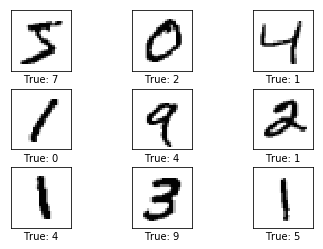

In [12]:
# Get the first images from the test-set.
images = X_test[0:9]

# Get the true classes for those images.
cls_true = Y_test_cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## One Hot Encoding

In [13]:
y_train_cls_char = Y_train_cls.astype(np.int)
y_val_cls_char = Y_val_cls.astype(np.int)
y_test_cls_char = Y_test_cls.astype(np.int)

Y_train_OHE = np.eye(10, dtype=float)[y_train_cls_char]
Y_val_OHE = np.eye(10, dtype=float)[y_val_cls_char]
Y_test_OHE = np.eye(10, dtype=float)[y_test_cls_char]

Y_test_OHE[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## TF-record (Optional)

[Referred this implementation to create tf.record](https://github.com/tensorflow/models/blob/master/research/slim/datasets/download_and_convert_mnist.py)

In [14]:
def int64_feature(values):
  if not isinstance(values, (tuple, list)):
    values = [values]
  return tf.train.Feature(int64_list=tf.train.Int64List(value=values))

In [15]:
def image_to_tfexample(image_data, image_format, height, width, class_id):
  return tf.train.Example(features=tf.train.Features(feature={
      'image/encoded':  tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_data])),
      'image/format':  tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_format])),
      'image/class/label': int64_feature(class_id),
      'image/height': int64_feature(height),
      'image/width': int64_feature(width),
  }))

In [33]:
def _add_to_tfrecord(data_filename, labels_filename, num_images, tfrecord_writer, images, labels):
    with tf.Graph().as_default():
        image = tf.placeholder(dtype=tf.uint8, shape=img_shape_storage)
        encoded_png = tf.image.encode_png(image)

        num_images = len(images)
        images = images.reshape(-1, img_w, img_h, 1)

        with tf.Session('') as sess:
            for j in range(num_images):
                sys.stdout.write('\r>> Converting image %d/%d' % (j + 1, num_images))
                sys.stdout.flush()

                png_string = sess.run(encoded_png, feed_dict={image: images[j]})
                example = image_to_tfexample(png_string, 'png'.encode(), img_shape, img_shape, labels[j])
                tfrecord_writer.write(example.SerializeToString())

#pngFname = target + "/" + "train_%d.png" % (j)
#pngFile=open(pngFname,'wb')
#pngFile.write(png_string);
#pngFile.close()

In [34]:
x_train = download_img(x_train_url, x_train_file, target,16)
print("x_train Set", len(x_train))

y_train_cls = download_cls(y_train_url, y_train_file, target,8)
print("y_train_cls Set", len(y_train_cls))

x_test = download_img(x_test_url, x_test_file, target,16)
print("x_test Set", len(x_test))

y_test_cls = download_cls(y_test_url, y_test_file, target,8)
print("y_test_cls Set", len(y_test_cls))

with tf.python_io.TFRecordWriter(training_recname) as tfrecord_writer:
    _add_to_tfrecord(x_train_rpath, y_train_rpath, 60000, tfrecord_writer, x_train, y_train_cls)

with tf.python_io.TFRecordWriter(testing_recname) as tfrecord_writer:
    _add_to_tfrecord(x_test_rpath, y_test_rpath, 10000, tfrecord_writer, x_test, y_test_cls)

x_train Set 60000
y_train_cls Set 60000
x_test Set 10000
y_test_cls Set 10000
>> Converting image 10000/10000